In [1]:
#load packages

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Y-Data

In [109]:
#read the y-data

path = r"Currencies - Final.xlsx"
y_var = pd.read_excel(path, dtype=None)

y_data = y_var.iloc[::-1]

y_data.head()

,Unnamed: 0,Date,EUR,GBP,JPY,CHF,AUD,CAD,CNY,NZD,SEK,HKD
239,251,2000-01-31,1.031460,0.618888,107.40,1.65660,1.570228,1.44585,8.2786,2.017960,8.86625,7.78035
238,250,2000-02-29,1.036592,0.633392,110.23,1.66450,1.615900,1.44890,8.2787,2.038944,8.75025,7.78280
237,249,2000-03-31,1.045861,0.628101,102.80,1.66465,1.645955,1.44910,8.2799,2.014302,8.64000,7.78665
236,248,2000-04-30,1.096191,0.644330,108.20,1.71720,1.712769,1.48100,8.2773,2.060793,8.91825,7.78910
235,247,2000-05-31,1.066212,0.666045,107.65,1.68100,1.746877,1.49680,8.2782,2.183645,8.94125,7.79215


# X-Data

In [110]:
#read the x-data

path = r"Economic Indicators Combined Total.xlsx"
x_var = pd.read_excel(path, dtype=None)
x_data = x_var.iloc[::-1]
x_data.head()

,Unnamed: 0,Date,10Y US Bond Yield,CPI,Fed Funds Rate,GDP Growth Monthly,New_Home_Sales,Non-Farm Payrolls,Oil Prices,PMI,Unemployment Rate,US Trade Balance
239,240,2000-01-01,7.642,0.3,5.87,-0.01,873000,233000,27.65,56.3,4.0,-26506000000
238,239,2000-02-01,7.602,0.4,5.85,0.01,856000,119000,30.57,56.9,4.1,-28640000000
237,238,2000-03-01,7.441,0.6,6.17,0.08,900000,472000,26.86,55.8,4.0,-30115000000
236,237,2000-04-01,7.601,-0.1,6.17,0.11,841000,292000,25.71,54.9,3.8,-28741000000
235,236,2000-05-01,7.649,0.2,6.83,0.07,857000,217000,29.03,53.2,4.0,-29906000000


# OLS-Loop for EUR

In [4]:
# Loop for EUR

y=y_data['EUR']
x1=x_data[['New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    EUR   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           9.44e-76
Time:                        21:38:55   Log-Likelihood:                 341.08
No. Observations:                 240   AIC:                            -668.2
Df Residuals:                     233   BIC:                            -643.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4921      0.04

## Chow-Test best promising EUR

In [84]:
# code for Chow-Test

# Model for the entire period
Y = y_data['EUR']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['EUR'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['EUR'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [85]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUR   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.52e-51
Time:                        00:30:32   Log-Likelihood:                 192.04
No. Observations:                 120   AIC:                            -362.1
Df Residuals:                     109   BIC:                            -331.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9939      0.124      7.996      0.000       0.748       1.240
10Y US Bond Yield      0.0882      0.013      6.595      0.000       0.062       0.115
CPI                    0.0017      0.016      0.108      0.914      -0.030       0.033
Fed Funds Rate        -0.0126      0.006     -2.166      0.032      -0.024      -0.001
GDP Growth Monthly     0.0044      0.189      0.023      0.982      -0.369       0.378
New_Home_Sales       1.63e-07   4.78e-08      3.408      0.001    6.82e-08    2.58e-07
Non-Farm Payrolls  -6.422e-08   4.53e-08     -1.417      0.159   -1.54e-07    2.56e-08
Oil Prices            -0.0013      0.001     -2.305      0.023      -0.002      -0.000
PMI                   -0.0069      0.002     -4.313      0.000      -0.010      -0.004
Unemployment Rate     -0.0143      0.009     -1.532      0.128      -0.033       0.004
US Trade Balance     4.15e-12   1.14e-12      3.654      0.000     1.9e-12     6.4e-12
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.248
Skew:                           0.211   Prob(JB):                        0.197
Kurtosis:                       2.313   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUR   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     74.39
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.18e-44
Time:                        00:30:33   Log-Likelihood:                 263.22
No. Observations:                 120   AIC:                            -504.4
Df Residuals:                     109   BIC:                            -473.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0910      0.091     12.055      0.000       0.912       1.270
10Y US Bond Yield     -0.0086      0.007     -1.196      0.234      -0.023       0.006
CPI                    0.0062      0.014      0.450      0.654      -0.021       0.033
Fed Funds Rate        -0.0069      0.008     -0.839      0.403      -0.023       0.009
GDP Growth Monthly    -0.1023      0.144     -0.710      0.479      -0.388       0.183
New_Home_Sales      3.928e-08   7.32e-08      0.537      0.592   -1.06e-07    1.84e-07
Non-Farm Payrolls   7.806e-09    2.9e-08      0.269      0.788   -4.96e-08    6.53e-08
Oil Prices            -0.0022      0.000    -11.556      0.000      -0.003      -0.002
PMI                   -0.0015      0.001     -1.365      0.175      -0.004       0.001
Unemployment Rate     -0.0107      0.004     -2.718      0.008      -0.019      -0.003
US Trade Balance   -8.893e-13    8.6e-13     -1.034      0.303   -2.59e-12    8.15e-13
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.753
Skew:                           0.163   Prob(JB):                        0.686
Kurtosis:                       2.789   Cond. No.                     2.44e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [88]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [89]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising EUR

In [5]:
def rolling_regression(y, x, window=60):
    # === Loop... this can be improved ====================================
    estimate_data = []
    for i in range(window, x.index.size+1):
        X_slice = X.values[i-window:i,:] # always index in np as opposed to pandas, much faster
        y_slice = y.values[i-window:i]
        coeff = np.dot(np.dot(np.linalg.inv(np.dot(X_slice.T, X_slice)), X_slice.T), y_slice)
        estimate_data.append(coeff[0] * x.values[window-1] + coeff[1])
    # === Assemble ========================================================
    estimate = pd.Series(data=estimate_data, index=x.index[window-1:]) 
    return estimate     

In [6]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['EUR']

In [7]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,0.543496,0.003873,0.225122,0.009488,139488.062292,13589.420192,4.873601,6.585193,0.610343,-6.167798e+09
179,0.551090,0.000021,0.225963,0.005755,142446.891991,13877.676291,4.973046,6.720945,0.619355,-6.298630e+09
178,0.542523,-0.000953,0.221876,0.004702,140484.043645,13686.447836,4.903546,6.627360,0.609847,-6.211838e+09
177,0.543220,0.000638,0.223100,0.006285,140252.815677,13663.922232,4.897065,6.618042,0.610433,-6.201614e+09
176,0.547755,0.011226,0.231206,0.016809,138688.400404,13511.520960,4.853036,6.554816,0.614219,-6.132439e+09


<function matplotlib.pyplot.show(*args, **kw)>

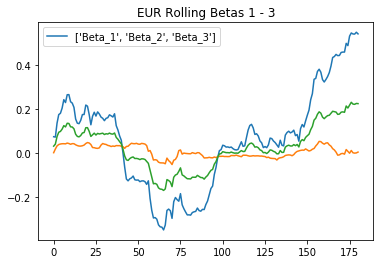

In [23]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('EUR Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'EUR' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

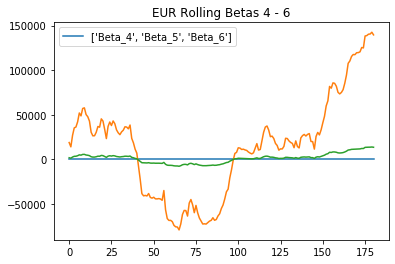

In [24]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('EUR Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'EUR' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

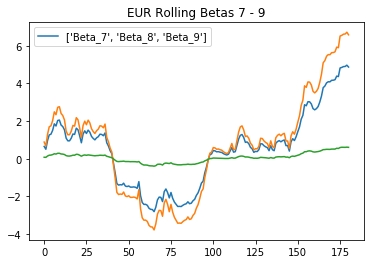

In [25]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('EUR Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'EUR' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

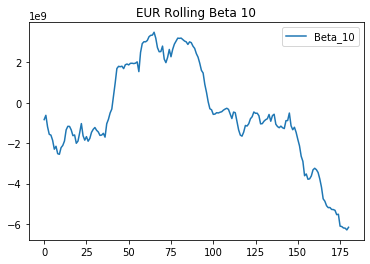

In [26]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('EUR Rolling Beta 10')
plt.savefig('Betas4_'+ 'EUR' +'.png')
plt.show

# OLS-Loop for GBP

In [27]:
y=y_data['GBP']
x1=x_data[['10Y US Bond Yield', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GBP   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     74.56
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.84e-51
Time:                        21:57:28   Log-Likelihood:                 385.91
No. Observations:                 240   AIC:                            -757.8
Df Residuals:                     233   BIC:                            -733.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0106      0.04

## Chow-Test best promising GBP

In [91]:
# code for Chow-Test

# Model for the entire period
Y = y_data['GBP']
X = x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['GBP'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['GBP'][120:]
X_2 = x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [92]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GBP   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     86.30
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.09e-45
Time:                        00:31:13   Log-Likelihood:                 274.14
No. Observations:                 120   AIC:                            -528.3
Df Residuals:                     110   BIC:                            -500.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6059      0.062      9.771      0.000       0.483       0.729
10Y US Bond Yield      0.0329      0.007      4.901      0.000       0.020       0.046
Fed Funds Rate        -0.0012      0.003     -0.399      0.690      -0.007       0.005
GDP Growth Monthly    -0.0573      0.094     -0.607      0.545      -0.244       0.130
New_Home_Sales      6.328e-08   2.31e-08      2.739      0.007    1.75e-08    1.09e-07
Non-Farm Payrolls  -6.042e-08   2.27e-08     -2.658      0.009   -1.05e-07   -1.54e-08
Oil Prices            -0.0007      0.000     -2.899      0.005      -0.001      -0.000
PMI                   -0.0043      0.001     -5.439      0.000      -0.006      -0.003
Unemployment Rate      0.0178      0.005      3.813      0.000       0.009       0.027
US Trade Balance    1.577e-12   5.34e-13      2.955      0.004    5.19e-13    2.63e-12
==============================================================================
Omnibus:                        0.217   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.379
Skew:                           0.065   Prob(JB):                        0.827
Kurtosis:                       2.757   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GBP   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     56.26
Date:                Wed, 26 May 2021   Prob (F-statistic):           4.26e-37
Time:                        00:31:14   Log-Likelihood:                 253.95
No. Observations:                 120   AIC:                            -487.9
Df Residuals:                     110   BIC:                            -460.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4045      0.097      4.159      0.000       0.212       0.597
10Y US Bond Yield     -0.0180      0.008     -2.322      0.022      -0.033      -0.003
Fed Funds Rate         0.0355      0.009      4.014      0.000       0.018       0.053
GDP Growth Monthly    -0.0489      0.154     -0.316      0.752      -0.355       0.257
New_Home_Sales      2.899e-07   7.87e-08      3.686      0.000    1.34e-07    4.46e-07
Non-Farm Payrolls  -1.104e-08   3.12e-08     -0.354      0.724   -7.28e-08    5.07e-08
Oil Prices            -0.0012      0.000     -6.165      0.000      -0.002      -0.001
PMI                    0.0026      0.001      2.284      0.024       0.000       0.005
Unemployment Rate      0.0124      0.004      2.913      0.004       0.004       0.021
US Trade Balance   -8.439e-13   9.24e-13     -0.913      0.363   -2.68e-12    9.88e-13
==============================================================================
Omnibus:                       26.192   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.380
Skew:                           1.099   Prob(JB):                     7.64e-09
Kurtosis:                       4.625   Cond. No.                     2.43e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [95]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [96]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising GBP

In [28]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['GBP']

In [30]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9
180,0.242757,0.114644,0.027874,56129.691909,5468.374746,1.985181,2.673922,0.269656,-2.481907e+09
179,0.248020,0.116257,0.027014,57728.879717,5624.172402,2.040087,2.748451,0.275685,-2.552619e+09
178,0.241107,0.113776,0.027535,55786.959103,5434.984220,1.972891,2.657427,0.267841,-2.466753e+09
177,0.242789,0.115236,0.028845,55884.202620,5444.459203,1.977592,2.663320,0.269570,-2.471052e+09
176,0.239171,0.113673,0.028674,54983.982584,5356.756485,1.946029,2.620711,0.265521,-2.431247e+09


<function matplotlib.pyplot.show(*args, **kw)>

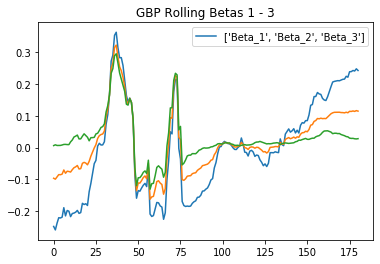

In [31]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('GBP Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'GBP' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

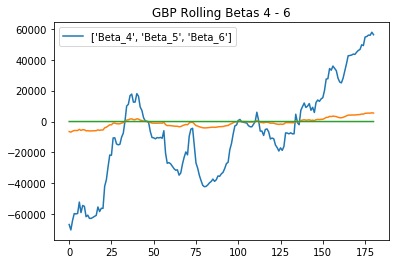

In [32]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('GBP Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'GBP' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

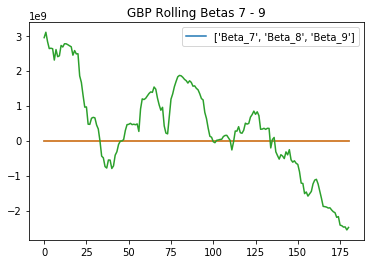

In [33]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('GBP Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'GBP' +'.png')
plt.show

# OLS-Loop for JPY

In [37]:
y=y_data['JPY']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPY   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     81.15
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.70e-54
Time:                        22:17:07   Log-Likelihood:                -826.31
No. Observations:                 240   AIC:                             1667.
Df Residuals:                     233   BIC:                             1691.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               137.1540      5.88

## Chow-Test best promising JPY

In [98]:
# code for Chow-Test

# Model for the entire period
Y = y_data['JPY']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['JPY'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['JPY'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [99]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    JPY   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     10.80
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.47e-12
Time:                        00:31:41   Log-Likelihood:                -402.96
No. Observations:                 120   AIC:                             827.9
Df Residuals:                     109   BIC:                             858.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                121.8517     17.693      6.887      0.000      86.785     156.918
10Y US Bond Yield      4.3272      1.904      2.273      0.025       0.554       8.100
CPI                    1.9803      2.280      0.868      0.387      -2.539       6.500
Fed Funds Rate        -1.9310      0.830     -2.326      0.022      -3.577      -0.285
GDP Growth Monthly    52.6743     26.845      1.962      0.052      -0.532     105.881
New_Home_Sales      7.458e-06   6.81e-06      1.095      0.276   -6.04e-06     2.1e-05
Non-Farm Payrolls  -7.102e-06   6.45e-06     -1.101      0.273   -1.99e-05    5.69e-06
Oil Prices            -0.1020      0.079     -1.297      0.197      -0.258       0.054
PMI                   -0.4485      0.228     -1.967      0.052      -0.900       0.003
Unemployment Rate     -3.1243      1.327     -2.355      0.020      -5.754      -0.495
US Trade Balance   -2.388e-10   1.62e-10     -1.477      0.143   -5.59e-10    8.16e-11
==============================================================================
Omnibus:                        0.959   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                1.040
Skew:                          -0.137   Prob(JB):                        0.595
Kurtosis:                       2.636   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    JPY   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.54e-52
Time:                        00:31:42   Log-Likelihood:                -343.18
No. Observations:                 120   AIC:                             708.4
Df Residuals:                     109   BIC:                             739.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.8466     14.168     13.047      0.000     156.767     212.926
10Y US Bond Yield     10.5489      1.130      9.335      0.000       8.309      12.789
CPI                   -6.4945      2.147     -3.024      0.003     -10.750      -2.239
Fed Funds Rate        -6.8994      1.292     -5.342      0.000      -9.459      -4.340
GDP Growth Monthly    31.2912     22.559      1.387      0.168     -13.420      76.003
New_Home_Sales     -5.439e-06   1.15e-05     -0.475      0.636   -2.81e-05    1.73e-05
Non-Farm Payrolls   2.097e-06   4.54e-06      0.462      0.645    -6.9e-06    1.11e-05
Oil Prices            -0.1974      0.029     -6.760      0.000      -0.255      -0.140
PMI                   -0.4985      0.167     -2.982      0.004      -0.830      -0.167
Unemployment Rate     -7.6874      0.619    -12.423      0.000      -8.914      -6.461
US Trade Balance     3.24e-10   1.35e-10      2.407      0.018    5.73e-11    5.91e-10
==============================================================================
Omnibus:                        3.264   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.045
Skew:                           0.390   Prob(JB):                        0.218
Kurtosis:                       2.988   Cond. No.                     2.44e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [102]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [103]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999473247

## Rolling regression best promising JPY

In [39]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['JPY']

In [40]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,43.806903,-0.634123,17.586994,-0.171658,1.148763e+07,1.119164e+06,400.415434,541.374734,49.312085,-5.079529e+11
179,44.200160,-0.807570,17.645899,-0.339208,1.163412e+07,1.133436e+06,405.356098,548.112885,49.775543,-5.144303e+11
178,43.250904,-0.911910,17.195138,-0.452340,1.141571e+07,1.112158e+06,397.626967,537.703823,48.721622,-5.047730e+11
177,43.458404,-0.704855,17.402375,-0.245281,1.141583e+07,1.112169e+06,397.838044,537.916314,48.929177,-5.047781e+11
176,43.895167,0.481275,18.281260,0.933051,1.122212e+07,1.093299e+06,392.261651,529.963056,49.273111,-4.962130e+11


<function matplotlib.pyplot.show(*args, **kw)>

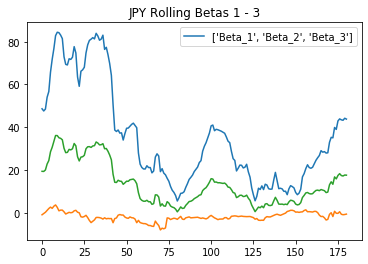

In [41]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('JPY Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'JPY' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

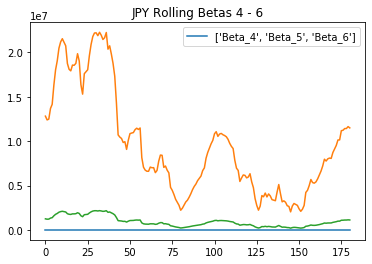

In [42]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('JPY Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'JPY' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

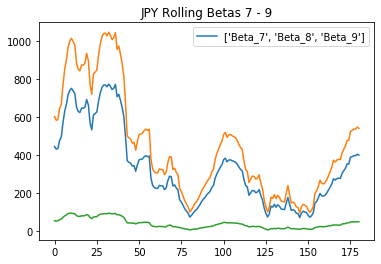

In [43]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('JPY Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'JPY' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

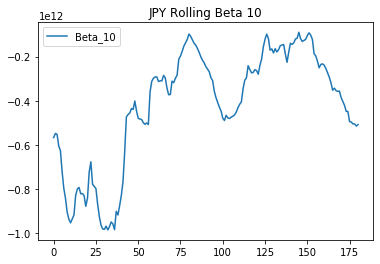

In [44]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('JPY Rolling Beta 10')
plt.savefig('Betas4_'+ 'JPY' +'.png')
plt.show

# OLS-Loop for CHF

In [47]:
y=y_data['CHF']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CHF   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     314.0
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.26e-108
Time:                        22:20:17   Log-Likelihood:                 257.89
No. Observations:                 240   AIC:                            -501.8
Df Residuals:                     233   BIC:                            -477.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4902      0.06

## Chow-Test best promising CHF

In [105]:
# code for Chow-Test

# Model for the entire period
Y = y_data['CHF']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['CHF'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['CHF'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [106]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CHF   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.00e-60
Time:                        00:32:54   Log-Likelihood:                 170.70
No. Observations:                 120   AIC:                            -321.4
Df Residuals:                     110   BIC:                            -293.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5316      0.146     10.498      0.000       1.242       1.821
10Y US Bond Yield     0.1135      0.016      7.139      0.000       0.082       0.145
CPI                  -0.0095      0.019     -0.499      0.619      -0.047       0.028
Fed Funds Rate       -0.0055      0.007     -0.795      0.428      -0.019       0.008
New_Home_Sales     1.976e-07    5.6e-08      3.528      0.001    8.66e-08    3.09e-07
Non-Farm Payrolls -8.313e-08    5.3e-08     -1.568      0.120   -1.88e-07     2.2e-08
Oil Prices           -0.0012      0.001     -1.852      0.067      -0.003     8.5e-05
PMI                  -0.0072      0.002     -3.845      0.000      -0.011      -0.004
Unemployment Rate    -0.0336      0.011     -3.072      0.003      -0.055      -0.012
US Trade Balance   6.948e-12   1.34e-12      5.204      0.000     4.3e-12    9.59e-12
==============================================================================
Omnibus:                        1.373   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.375
Skew:                           0.170   Prob(JB):                        0.503
Kurtosis:                       2.601   Cond. No.                     1.27e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CHF   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     15.22
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.83e-16
Time:                        00:32:55   Log-Likelihood:                 229.29
No. Observations:                 120   AIC:                            -438.6
Df Residuals:                     110   BIC:                            -410.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8461      0.117      7.227      0.000       0.614       1.078
10Y US Bond Yield     0.0076      0.010      0.797      0.427      -0.011       0.026
CPI                  -0.0385      0.018     -2.133      0.035      -0.074      -0.003
Fed Funds Rate        0.0340      0.011      3.133      0.002       0.012       0.055
New_Home_Sales     1.495e-07   9.53e-08      1.568      0.120   -3.94e-08    3.38e-07
Non-Farm Payrolls  7.547e-10   3.72e-08      0.020      0.984    -7.3e-08    7.45e-08
Oil Prices           -0.0021      0.000     -8.649      0.000      -0.003      -0.002
PMI                   0.0019      0.001      1.329      0.187      -0.001       0.005
Unemployment Rate     0.0255      0.005      4.909      0.000       0.015       0.036
US Trade Balance   2.264e-12   1.13e-12      2.003      0.048    2.41e-14     4.5e-12
==============================================================================
Omnibus:                       23.847   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.176
Skew:                          -0.687   Prob(JB):                     7.03e-15
Kurtosis:                       6.339   Cond. No.                     1.48e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [109]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [110]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising CHF

In [48]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['CHF']

In [49]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9
180,0.697402,-0.012951,0.278299,183620.227946,17888.915510,6.397495,8.650613,0.785398,-8.119208e+09
179,0.702743,-0.012268,0.280891,184824.400741,18006.230867,6.440217,8.708111,0.791316,-8.172453e+09
178,0.683361,-0.013880,0.271993,180230.776441,17558.702407,6.278235,8.489763,0.769732,-7.969335e+09
177,0.685767,-0.011995,0.274092,180365.409916,17571.820575,6.284821,8.498000,0.772203,-7.975288e+09
176,0.690638,-0.010363,0.277052,181202.682491,17653.392081,6.315683,8.539136,0.777475,-8.012310e+09


<function matplotlib.pyplot.show(*args, **kw)>

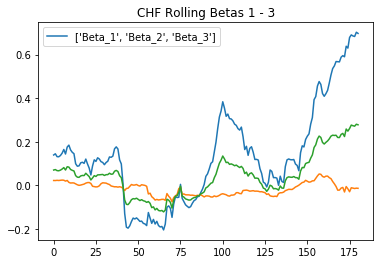

In [50]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('CHF Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'CHF' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

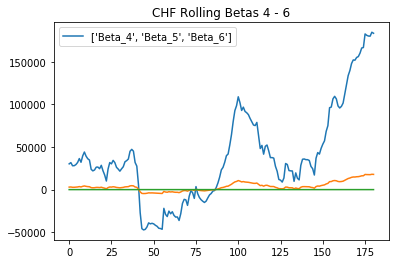

In [51]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('CHF Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'CHF' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

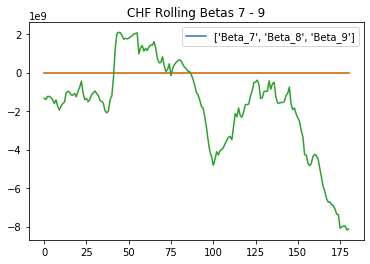

In [52]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('CHF Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'CHF' +'.png')
plt.show

# OLS-Loop for AUD

In [55]:
y=y_data['AUD']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AUD   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.93e-67
Time:                        22:22:29   Log-Likelihood:                 139.23
No. Observations:                 240   AIC:                            -264.5
Df Residuals:                     233   BIC:                            -240.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1334      0

## Chow-Test best promising AUD

In [112]:
# code for Chow-Test

# Model for the entire period
Y = y_data['AUD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['AUD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['AUD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [113]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUD   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     95.77
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.31e-48
Time:                        00:33:20   Log-Likelihood:                 112.67
No. Observations:                 120   AIC:                            -205.3
Df Residuals:                     110   BIC:                            -177.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4909      0.213     11.674      0.000       2.068       2.914
10Y US Bond Yield      0.1234      0.026      4.803      0.000       0.073       0.174
CPI                    0.0487      0.030      1.639      0.104      -0.010       0.108
Fed Funds Rate        -0.0473      0.011     -4.409      0.000      -0.069      -0.026
GDP Growth Monthly     0.0719      0.358      0.201      0.841      -0.638       0.782
Non-Farm Payrolls  -9.734e-08   8.03e-08     -1.213      0.228   -2.56e-07    6.17e-08
Oil Prices            -0.0063      0.001     -8.907      0.000      -0.008      -0.005
PMI                   -0.0167      0.003     -5.415      0.000      -0.023      -0.011
Unemployment Rate     -0.0508      0.017     -2.965      0.004      -0.085      -0.017
US Trade Balance    1.429e-12   1.91e-12      0.750      0.455   -2.35e-12     5.2e-12
==============================================================================
Omnibus:                        6.086   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                3.845
Skew:                           0.266   Prob(JB):                        0.146
Kurtosis:                       2.303   Cond. No.                     1.92e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUD   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.17e-58
Time:                        00:33:21   Log-Likelihood:                 197.03
No. Observations:                 120   AIC:                            -374.1
Df Residuals:                     110   BIC:                            -346.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1347      0.099     21.597      0.000       1.939       2.331
10Y US Bond Yield      0.0866      0.012      7.036      0.000       0.062       0.111
CPI                   -0.0025      0.024     -0.105      0.916      -0.049       0.044
Fed Funds Rate         0.0327      0.012      2.772      0.007       0.009       0.056
GDP Growth Monthly     0.3663      0.246      1.491      0.139      -0.121       0.853
Non-Farm Payrolls  -1.881e-08   5.01e-08     -0.376      0.708   -1.18e-07    8.04e-08
Oil Prices            -0.0044      0.000    -14.112      0.000      -0.005      -0.004
PMI                   -0.0098      0.002     -5.301      0.000      -0.013      -0.006
Unemployment Rate     -0.0420      0.005     -8.808      0.000      -0.051      -0.033
US Trade Balance    1.451e-12   1.35e-12      1.074      0.285   -1.23e-12    4.13e-12
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.350
Skew:                           0.066   Prob(JB):                        0.839
Kurtosis:                       2.770   Cond. No.                     2.38e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [116]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [117]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999318383

## Rolling regression best promising AUD

In [56]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['AUD']

In [57]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9
180,0.842611,0.034669,0.365930,0.043077,20346.547295,7.325783,9.888435,0.942695,-9.234626e+09
179,0.864951,0.032678,0.373916,0.041339,20959.271089,7.543361,10.183186,0.968049,-9.512723e+09
178,0.837942,0.030501,0.361557,0.038904,20333.923211,7.317093,9.878155,0.937964,-9.228899e+09
177,0.830069,0.031636,0.358999,0.039945,20107.086209,7.236941,9.769433,0.928976,-9.125944e+09
176,0.833522,0.054406,0.373849,0.062514,19620.654312,7.085391,9.556614,0.930036,-8.905158e+09


<function matplotlib.pyplot.show(*args, **kw)>

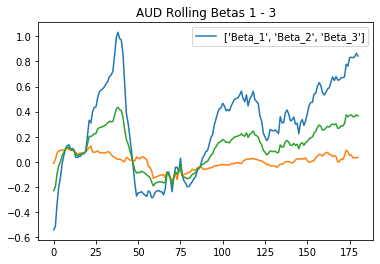

In [58]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('AUD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'AUD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

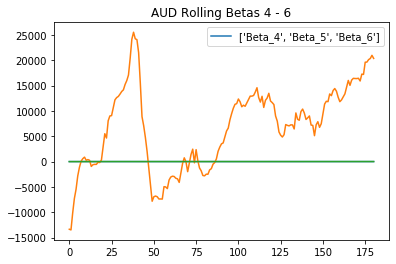

In [59]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('AUD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'AUD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

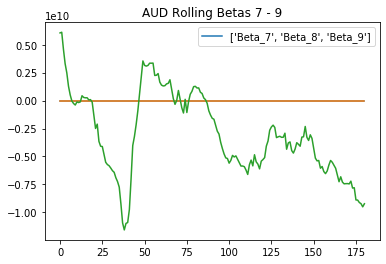

In [60]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('AUD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'AUD' +'.png')
plt.show

# OLS-Loop for CAD

In [118]:
y=y_data['CAD']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CAD   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     90.40
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.03e-58
Time:                        00:33:41   Log-Likelihood:                 213.48
No. Observations:                 240   AIC:                            -413.0
Df Residuals:                     233   BIC:                            -388.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5712      0

## Chow-Test best promising CAD

In [119]:
# code for Chow-Test

# Model for the entire period
Y = y_data['CAD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['CAD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['CAD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [120]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CAD   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.93e-54
Time:                        00:33:55   Log-Likelihood:                 176.11
No. Observations:                 120   AIC:                            -330.2
Df Residuals:                     109   BIC:                            -299.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9470      0.142     13.718      0.000       1.666       2.228
10Y US Bond Yield      0.0600      0.015      3.932      0.000       0.030       0.090
CPI                    0.0319      0.018      1.742      0.084      -0.004       0.068
Fed Funds Rate        -0.0415      0.007     -6.234      0.000      -0.055      -0.028
GDP Growth Monthly    -0.2033      0.215     -0.944      0.347      -0.630       0.224
New_Home_Sales      1.285e-07   5.46e-08      2.354      0.020    2.03e-08    2.37e-07
Non-Farm Payrolls  -2.964e-08   5.18e-08     -0.573      0.568   -1.32e-07     7.3e-08
Oil Prices            -0.0030      0.001     -4.824      0.000      -0.004      -0.002
PMI                   -0.0060      0.002     -3.256      0.002      -0.010      -0.002
Unemployment Rate     -0.0459      0.011     -4.314      0.000      -0.067      -0.025
US Trade Balance     5.27e-12    1.3e-12      4.064      0.000     2.7e-12    7.84e-12
==============================================================================
Omnibus:                        3.623   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.082
Skew:                           0.372   Prob(JB):                        0.214
Kurtosis:                       3.250   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CAD   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     305.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.92e-75
Time:                        00:33:56   Log-Likelihood:                 264.87
No. Observations:                 120   AIC:                            -507.7
Df Residuals:                     109   BIC:                            -477.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7615      0.089     19.734      0.000       1.585       1.938
10Y US Bond Yield      0.0411      0.007      5.771      0.000       0.027       0.055
CPI                    0.0053      0.014      0.393      0.695      -0.022       0.032
Fed Funds Rate        -0.0038      0.008     -0.465      0.643      -0.020       0.012
GDP Growth Monthly     0.1855      0.142      1.305      0.195      -0.096       0.467
New_Home_Sales      1.501e-08   7.22e-08      0.208      0.836   -1.28e-07    1.58e-07
Non-Farm Payrolls  -1.101e-08   2.86e-08     -0.385      0.701   -6.77e-08    4.57e-08
Oil Prices            -0.0034      0.000    -18.722      0.000      -0.004      -0.003
PMI                   -0.0040      0.001     -3.796      0.000      -0.006      -0.002
Unemployment Rate     -0.0418      0.004    -10.728      0.000      -0.050      -0.034
US Trade Balance   -6.115e-13   8.48e-13     -0.721      0.472   -2.29e-12    1.07e-12
==============================================================================
Omnibus:                        5.164   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.589
Skew:                          -0.419   Prob(JB):                        0.101
Kurtosis:                       3.466   Cond. No.                     2.44e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [123]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [124]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999187

## Rolling regression best promising CAD

In [63]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['CAD']

In [64]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,0.412403,0.032253,0.188117,0.036209,98265.675877,9573.416213,3.462847,4.668619,0.459495,-4.345050e+09
179,0.418824,0.029155,0.188922,0.033210,100726.188740,9813.125217,3.545649,4.781613,0.467095,-4.453848e+09
178,0.409597,0.028115,0.184525,0.032085,98609.901264,9606.948124,3.470727,4.680723,0.456854,-4.360271e+09
177,0.408963,0.028817,0.184679,0.032773,98264.621801,9573.310420,3.459375,4.665133,0.456054,-4.345004e+09
176,0.414545,0.049630,0.199247,0.053427,94327.520681,9189.762993,3.342737,4.500185,0.459749,-4.170915e+09


<function matplotlib.pyplot.show(*args, **kw)>

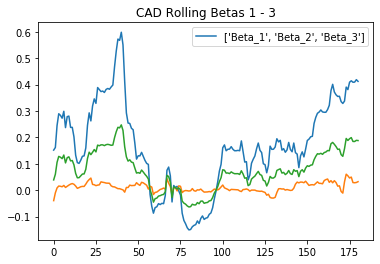

In [65]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('CAD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'CAD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

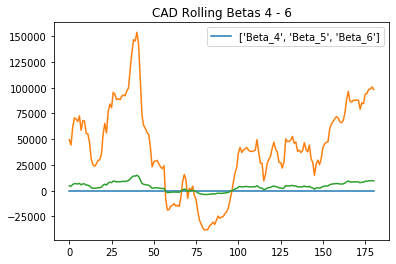

In [66]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('CAD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'CAD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

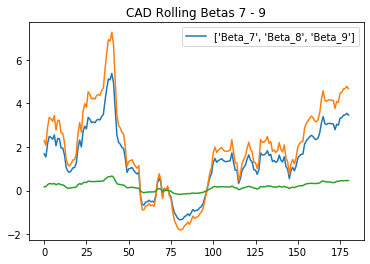

In [67]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('CAD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'CAD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

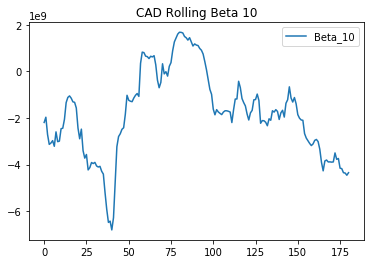

In [68]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('CAD Rolling Beta 10')
plt.savefig('Betas4_'+ 'CAD' +'.png')
plt.show

# OLS-Loop for CNY

In [71]:
y=y_data['CNY']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CNY   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     492.1
Date:                Wed, 26 May 2021   Prob (F-statistic):          2.83e-129
Time:                        22:27:24   Log-Likelihood:                 21.532
No. Observations:                 240   AIC:                            -29.06
Df Residuals:                     233   BIC:                            -4.700
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2291      0

## Chow-Test best promising CNY

In [126]:
# code for Chow-Test

# Model for the entire period
Y = y_data['CNY']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['CNY'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['CNY'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [127]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CNY   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 26 May 2021   Prob (F-statistic):           8.03e-82
Time:                        00:34:20   Log-Likelihood:                 121.19
No. Observations:                 120   AIC:                            -220.4
Df Residuals:                     109   BIC:                            -189.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.7851      0.224     34.707      0.000       7.341       8.230
10Y US Bond Yield      0.0620      0.024      2.568      0.012       0.014       0.110
CPI                    0.0422      0.029      1.460      0.147      -0.015       0.099
Fed Funds Rate        -0.0292      0.011     -2.773      0.007      -0.050      -0.008
GDP Growth Monthly     0.4866      0.340      1.430      0.156      -0.188       1.161
New_Home_Sales      1.082e-06   8.63e-08     12.538      0.000    9.11e-07    1.25e-06
Non-Farm Payrolls   1.698e-08   8.18e-08      0.208      0.836   -1.45e-07    1.79e-07
Oil Prices            -0.0061      0.001     -6.096      0.000      -0.008      -0.004
PMI                    0.0024      0.003      0.847      0.399      -0.003       0.008
Unemployment Rate     -0.1157      0.017     -6.878      0.000      -0.149      -0.082
US Trade Balance    6.424e-12   2.05e-12      3.135      0.002    2.36e-12    1.05e-11
==============================================================================
Omnibus:                        1.129   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.675
Skew:                           0.053   Prob(JB):                        0.714
Kurtosis:                       3.352   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CNY   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     20.91
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.80e-21
Time:                        00:34:21   Log-Likelihood:                 44.041
No. Observations:                 120   AIC:                            -66.08
Df Residuals:                     109   BIC:                            -35.42
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2138      0.562      9.274      0.000       4.100       6.328
10Y US Bond Yield      0.0466      0.045      1.038      0.301      -0.042       0.135
CPI                    0.1234      0.085      1.448      0.150      -0.045       0.292
Fed Funds Rate         0.2095      0.051      4.087      0.000       0.108       0.311
GDP Growth Monthly     0.6256      0.895      0.699      0.486      -1.149       2.400
New_Home_Sales      1.127e-06   4.54e-07      2.480      0.015    2.26e-07    2.03e-06
Non-Farm Payrolls  -1.642e-07    1.8e-07     -0.912      0.364   -5.21e-07    1.93e-07
Oil Prices            -0.0090      0.001     -7.740      0.000      -0.011      -0.007
PMI                   -0.0018      0.007     -0.277      0.782      -0.015       0.011
Unemployment Rate      0.1437      0.025      5.852      0.000       0.095       0.192
US Trade Balance   -8.412e-12   5.34e-12     -1.575      0.118    -1.9e-11    2.17e-12
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.051
Skew:                           0.022   Prob(JB):                        0.975
Kurtosis:                       2.910   Cond. No.                     2.44e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [130]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [131]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising CNY

In [72]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['CNY']

In [73]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,0.995319,-0.110202,0.343069,-0.098697,285767.614491,27840.384716,9.866359,13.372881,1.132267,-1.263590e+10
179,1.014673,-0.100115,0.356956,-0.088514,288163.187193,28073.778922,9.960079,13.495995,1.152769,-1.274183e+10
178,0.947643,-0.107442,0.325150,-0.096462,272730.337045,26570.249871,9.413969,12.760516,1.078343,-1.205943e+10
177,0.908858,-0.132248,0.294613,-0.121414,269116.771069,26218.181200,9.263009,12.565217,1.037826,-1.189965e+10
176,0.923632,-0.056163,0.345559,-0.045967,253268.599478,24674.265360,8.785808,11.893549,1.045005,-1.119888e+10


<function matplotlib.pyplot.show(*args, **kw)>

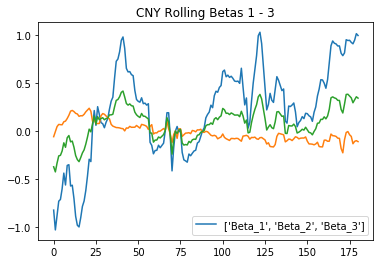

In [74]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('CNY Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'CNY' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

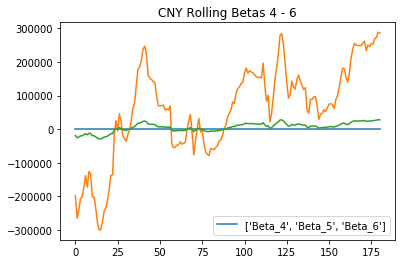

In [75]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('CNY Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'CNY' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

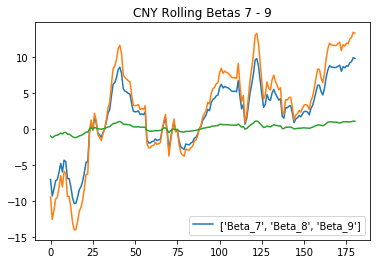

In [76]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('CNY Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'CNY' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

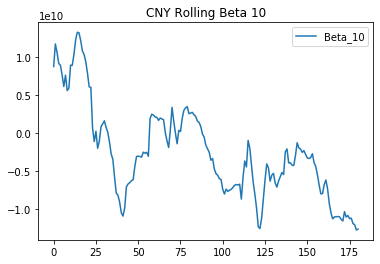

In [77]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('CNY Rolling Beta 10')
plt.savefig('Betas4_'+ 'CNY' +'.png')
plt.show

# OLS-Loop for NZD

In [80]:
y=y_data['NZD']
x1=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices',]]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    NZD   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.63e-66
Time:                        22:29:32   Log-Likelihood:                 83.380
No. Observations:                 240   AIC:                            -152.8
Df Residuals:                     233   BIC:                            -128.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1856      0

## Chow-Test best promising NZD

In [133]:
# code for Chow-Test

# Model for the entire period
Y = y_data['NZD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['NZD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['NZD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [134]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NZD   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     102.1
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.29e-50
Time:                        00:34:45   Log-Likelihood:                 85.738
No. Observations:                 120   AIC:                            -149.5
Df Residuals:                     109   BIC:                            -118.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4436      0.301      8.107      0.000       1.846       3.041
10Y US Bond Yield      0.1977      0.032      6.096      0.000       0.133       0.262
CPI                    0.0343      0.039      0.884      0.379      -0.043       0.111
Fed Funds Rate        -0.0267      0.014     -1.890      0.061      -0.055       0.001
GDP Growth Monthly    -0.4103      0.457     -0.897      0.372      -1.317       0.496
New_Home_Sales      2.571e-07   1.16e-07      2.217      0.029    2.73e-08    4.87e-07
Non-Farm Payrolls  -3.012e-07    1.1e-07     -2.740      0.007   -5.19e-07   -8.33e-08
Oil Prices            -0.0033      0.001     -2.488      0.014      -0.006      -0.001
PMI                   -0.0218      0.004     -5.619      0.000      -0.030      -0.014
Unemployment Rate     -0.0240      0.023     -1.063      0.290      -0.069       0.021
US Trade Balance    9.915e-12   2.75e-12      3.600      0.000    4.46e-12    1.54e-11
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.533
Skew:                           0.111   Prob(JB):                        0.465
Kurtosis:                       2.493   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NZD   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     36.97
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.51e-30
Time:                        00:34:46   Log-Likelihood:                 172.12
No. Observations:                 120   AIC:                            -322.2
Df Residuals:                     109   BIC:                            -291.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6458      0.193      8.512      0.000       1.263       2.029
10Y US Bond Yield      0.0546      0.015      3.540      0.001       0.024       0.085
CPI                    0.0092      0.029      0.316      0.753      -0.049       0.067
Fed Funds Rate         0.0565      0.018      3.204      0.002       0.022       0.091
GDP Growth Monthly     0.0053      0.308      0.017      0.986      -0.605       0.616
New_Home_Sales      9.092e-08   1.56e-07      0.582      0.562   -2.19e-07    4.01e-07
Non-Farm Payrolls  -9.511e-09   6.19e-08     -0.154      0.878   -1.32e-07    1.13e-07
Oil Prices            -0.0046      0.000    -11.560      0.000      -0.005      -0.004
PMI                   -0.0056      0.002     -2.446      0.016      -0.010      -0.001
Unemployment Rate      0.0141      0.008      1.665      0.099      -0.003       0.031
US Trade Balance   -1.145e-12   1.84e-12     -0.623      0.534   -4.79e-12     2.5e-12
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.007
Skew:                           0.001   Prob(JB):                        0.996
Kurtosis:                       2.962   Cond. No.                     2.44e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [137]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [138]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising NZD

In [85]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['NZD']

In [91]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,1.130746,0.015683,0.472866,0.027286,288234.460260,28080.827111,10.078360,13.615150,1.268876,-1.274498e+10
179,1.156237,0.009588,0.479722,0.021521,296398.864313,28876.226514,10.357297,13.994268,1.298279,-1.310598e+10
178,1.132044,0.006847,0.468185,0.018556,290853.875679,28336.011781,10.160972,13.729904,1.271429,-1.286080e+10
177,1.140881,0.016638,0.477585,0.028338,290607.208095,28311.989397,10.162152,13.728057,1.280148,-1.284989e+10
176,1.130831,0.016299,0.473265,0.027897,288096.931562,28067.429139,10.074175,13.609278,1.268895,-1.273889e+10


<function matplotlib.pyplot.show(*args, **kw)>

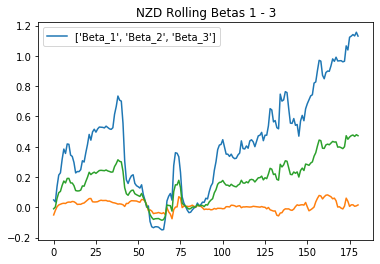

In [96]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('NZD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'NZD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

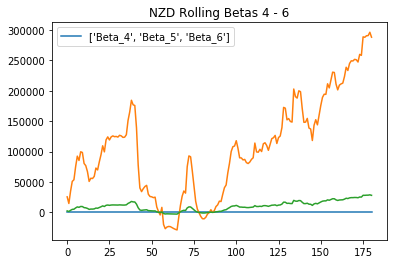

In [97]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('NZD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'NZD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

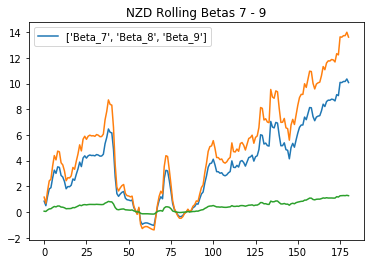

In [98]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('NZD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'NZD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

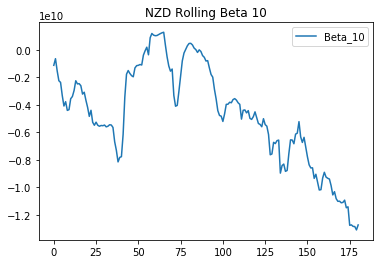

In [99]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('NZD Rolling Beta 10')
plt.savefig('Betas4_'+ 'NZD' +'.png')
plt.show

# OLS-Loop for SEK

In [102]:
y=y_data['SEK']
x1=x_data[['Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI']]
x2=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    SEK   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     86.36
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.99e-56
Time:                        22:33:58   Log-Likelihood:                -246.48
No. Observations:                 240   AIC:                             507.0
Df Residuals:                     233   BIC:                             531.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.4676      0

## Chow-Test best promising SEK

In [140]:
# code for Chow-Test

# Model for the entire period
Y = y_data['SEK']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['SEK'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['SEK'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [141]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SEK   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     63.26
Date:                Wed, 26 May 2021   Prob (F-statistic):           9.72e-41
Time:                        00:35:07   Log-Likelihood:                -87.453
No. Observations:                 120   AIC:                             196.9
Df Residuals:                     109   BIC:                             227.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.8708      1.276      6.950      0.000       6.341      11.400
10Y US Bond Yield      0.6552      0.137      4.772      0.000       0.383       0.927
CPI                    0.0736      0.165      0.447      0.656      -0.252       0.400
Fed Funds Rate        -0.0721      0.060     -1.203      0.231      -0.191       0.047
GDP Growth Monthly    -1.0158      1.937     -0.525      0.601      -4.854       2.822
New_Home_Sales      1.674e-06   4.91e-07      3.409      0.001    7.01e-07    2.65e-06
Non-Farm Payrolls  -1.172e-06   4.65e-07     -2.517      0.013   -2.09e-06   -2.49e-07
Oil Prices            -0.0133      0.006     -2.346      0.021      -0.025      -0.002
PMI                   -0.0736      0.016     -4.476      0.000      -0.106      -0.041
Unemployment Rate      0.0564      0.096      0.589      0.557      -0.133       0.246
US Trade Balance    2.914e-11   1.17e-11      2.499      0.014    6.03e-12    5.23e-11
==============================================================================
Omnibus:                        4.845   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.740
Skew:                           0.311   Prob(JB):                        0.154
Kurtosis:                       2.399   Cond. No.                     1.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SEK   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           6.01e-52
Time:                        00:35:08   Log-Likelihood:                -37.085
No. Observations:                 120   AIC:                             96.17
Df Residuals:                     109   BIC:                             126.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.3340      1.105      8.444      0.000       7.143      11.525
10Y US Bond Yield      0.1725      0.088      1.957      0.053      -0.002       0.347
CPI                    0.0199      0.168      0.119      0.905      -0.312       0.352
Fed Funds Rate         0.3468      0.101      3.441      0.001       0.147       0.546
GDP Growth Monthly     1.7372      1.760      0.987      0.326      -1.751       5.226
New_Home_Sales      1.971e-06   8.93e-07      2.206      0.030       2e-07    3.74e-06
Non-Farm Payrolls   1.134e-07   3.54e-07      0.320      0.749   -5.88e-07    8.15e-07
Oil Prices            -0.0282      0.002    -12.363      0.000      -0.033      -0.024
PMI                   -0.0304      0.013     -2.331      0.022      -0.056      -0.005
Unemployment Rate     -0.0333      0.048     -0.691      0.491      -0.129       0.062
US Trade Balance   -1.587e-11   1.05e-11     -1.511      0.134   -3.67e-11    4.94e-12
==============================================================================
Omnibus:                        2.358   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                1.640
Skew:                          -0.021   Prob(JB):                        0.440
Kurtosis:                       2.429   Cond. No.                     2.44e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [144]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [145]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising SEK

In [103]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['SEK']

In [104]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,5.197152,0.020170,2.142767,0.074043,1.338206e+06,130372.742940,46.738858,63.159356,5.838457,-5.917198e+10
179,5.233155,-0.045855,2.118574,0.009080,1.364579e+06,132942.054099,47.593562,64.337674,5.887098,-6.033813e+10
178,5.169788,-0.053196,2.088262,0.001156,1.350097e+06,131531.117601,47.080619,63.647024,5.816791,-5.969776e+10
177,5.145306,-0.060469,2.073933,-0.006297,1.345649e+06,131097.749185,46.918052,63.429875,5.790177,-5.950107e+10
176,5.223044,0.023190,2.155165,0.077301,1.344118e+06,130948.733547,46.948281,63.441325,5.867182,-5.943340e+10


<function matplotlib.pyplot.show(*args, **kw)>

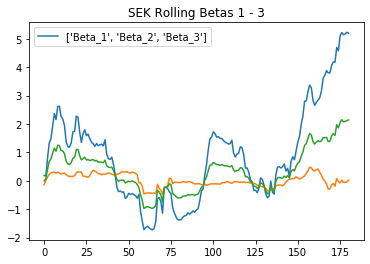

In [105]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('SEK Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'SEK' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

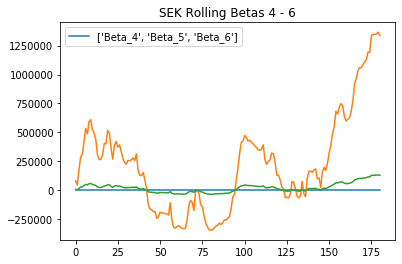

In [106]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('SEK Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'SEK' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

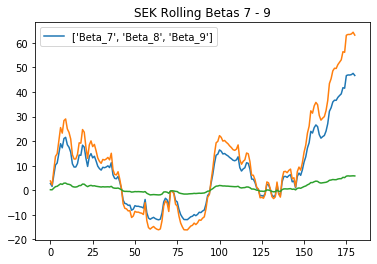

In [107]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('SEK Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'SEK' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

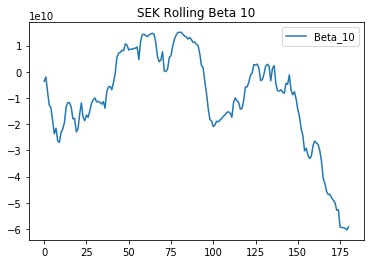

In [108]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('SEK Rolling Beta 10')
plt.savefig('Betas4_'+ 'SEK' +'.png')
plt.show

# OLS-Loop for HKD

In [111]:
y=y_data['HKD']
x1=x_data[['GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x2=x_data[['Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x3=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    HKD   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     20.24
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.01e-19
Time:                        22:36:02   Log-Likelihood:                 573.63
No. Observations:                 240   AIC:                            -1133.
Df Residuals:                     233   BIC:                            -1109.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.7698      0

## Chow-Test best promising HKD

In [147]:
# code for Chow-Test

# Model for the entire period
Y = y_data['HKD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['HKD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['HKD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']][120:]
X_2 = sm.add_constant(X_2)

In [148]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HKD   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     9.114
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.33e-10
Time:                        00:35:38   Log-Likelihood:                 330.78
No. Observations:                 120   AIC:                            -641.6
Df Residuals:                     110   BIC:                            -613.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.9215      0.038    210.787      0.000       7.847       7.996
10Y US Bond Yield      0.0030      0.003      0.878      0.382      -0.004       0.010
CPI                    0.0094      0.005      1.993      0.049    5.39e-05       0.019
Fed Funds Rate        -0.0069      0.002     -4.001      0.000      -0.010      -0.003
GDP Growth Monthly     0.0574      0.058      0.982      0.328      -0.058       0.173
New_Home_Sales     -3.005e-08    1.3e-08     -2.306      0.023   -5.59e-08   -4.22e-09
Non-Farm Payrolls   1.298e-08    1.4e-08      0.930      0.355   -1.47e-08    4.06e-08
Oil Prices            -0.0002      0.000     -1.518      0.132      -0.000    4.85e-05
PMI                   -0.0003      0.000     -0.713      0.478      -0.001       0.001
Unemployment Rate     -0.0149      0.003     -5.615      0.000      -0.020      -0.010
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   0.620
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.661
Skew:                          -0.090   Prob(JB):                        0.718
Kurtosis:                       3.316   Cond. No.                     3.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HKD   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     80.34
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.27e-44
Time:                        00:35:39   Log-Likelihood:                 361.56
No. Observations:                 120   AIC:                            -703.1
Df Residuals:                     110   BIC:                            -675.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.7067      0.032    244.317      0.000       7.644       7.769
10Y US Bond Yield      0.0023      0.003      0.741      0.460      -0.004       0.009
CPI                    0.0062      0.006      1.036      0.303      -0.006       0.018
Fed Funds Rate         0.0423      0.003     16.784      0.000       0.037       0.047
GDP Growth Monthly    -0.0702      0.063     -1.116      0.267      -0.195       0.054
New_Home_Sales     -9.841e-09   2.92e-08     -0.337      0.736   -6.76e-08     4.8e-08
Non-Farm Payrolls   -7.74e-10   1.27e-08     -0.061      0.952    -2.6e-08    2.44e-08
Oil Prices         -6.297e-05    8.1e-05     -0.777      0.439      -0.000    9.77e-05
PMI                    0.0007      0.000      1.586      0.116      -0.000       0.002
Unemployment Rate      0.0019      0.002      1.127      0.262      -0.001       0.005
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.212
Skew:                           0.236   Prob(JB):                        0.546
Kurtosis:                       2.860   Cond. No.                     2.98e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [151]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [152]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

## Rolling regression best promising HKD

In [112]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
Y= y_data['HKD']

In [113]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9
180,0.931561,-0.111011,0.316450,-0.100162,269495.878762,26255.134369,9.297480,12.604339,1.060711
179,0.957813,-0.102945,0.331973,-0.091906,274196.845136,26713.126297,9.469664,12.834206,1.089216
178,0.914311,-0.106695,0.311924,-0.096071,263921.406991,25712.053656,9.107183,12.345640,1.040789
177,0.814891,-0.140417,0.251265,-0.130476,246938.953033,24057.532938,8.480580,11.510654,0.933231
176,0.833356,-0.068236,0.301423,-0.058853,233053.626035,22704.840788,8.068003,10.927696,0.945041


<function matplotlib.pyplot.show(*args, **kw)>

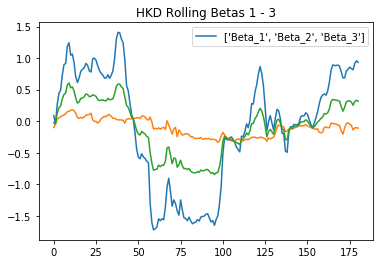

In [114]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('HKD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'HKD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

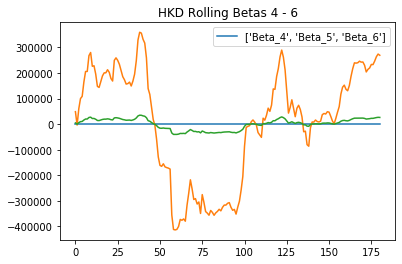

In [115]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('HKD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'HKD' +'.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

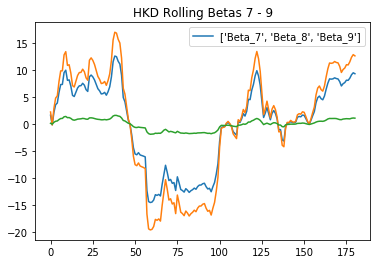

In [116]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('HKD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'HKD' +'.png')
plt.show